In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import sqlite3
import taxis
import matplotlib.pyplot as plt
from utils import *
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [2]:
DBNAME="taxis.db"
LAT=1.380766
LON=103.891675
LAT1=1.303693
LON1=103.844952
x,y = get_grid_cell(LAT,LON,20)
x1,y1 = get_grid_cell(LAT1,LON1,20)
print x,y
print x1,y1


24 12
20 5


In [3]:
data=taxis.fetch_grid_by_date(DBNAME,"20170627")

In [4]:
df = pd.DataFrame(data)
df.columns=['time','x','y','taxicount']

In [5]:
df.head()


,time,x,y,taxicount
0,0000,0,0,0
1,0000,1,0,0
2,0000,2,0,0
3,0000,3,0,0
4,0000,4,0,0


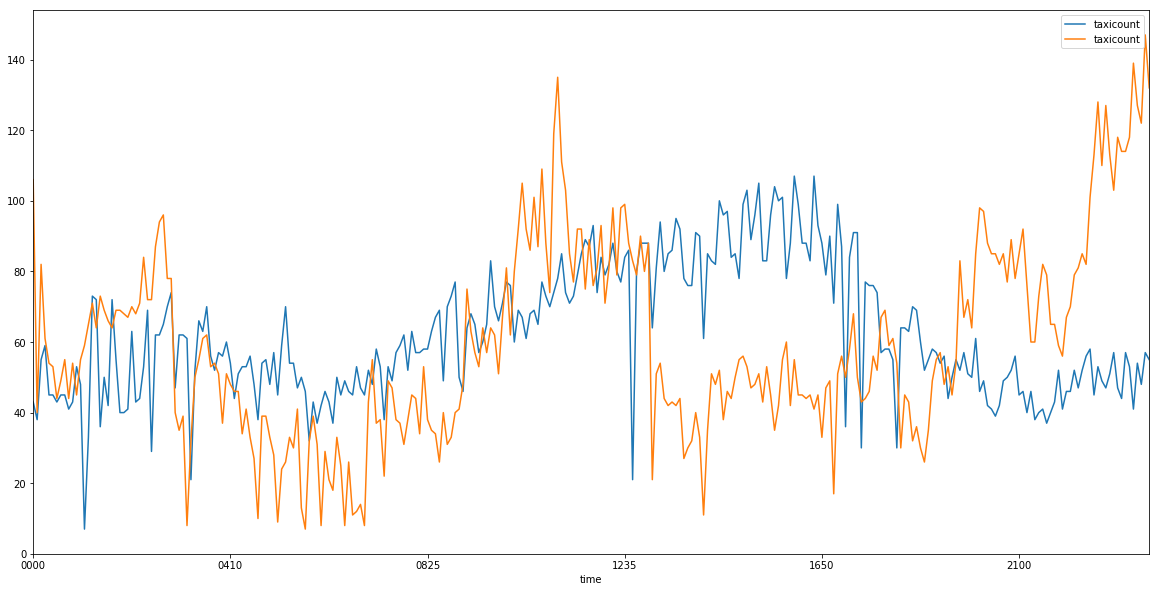

In [6]:
ax=df.query('x==20 and y==12').plot(y='taxicount',x='time')
df.query('x==20 and y==5').plot(ax=ax,y='taxicount',x='time')
plt.show()


280


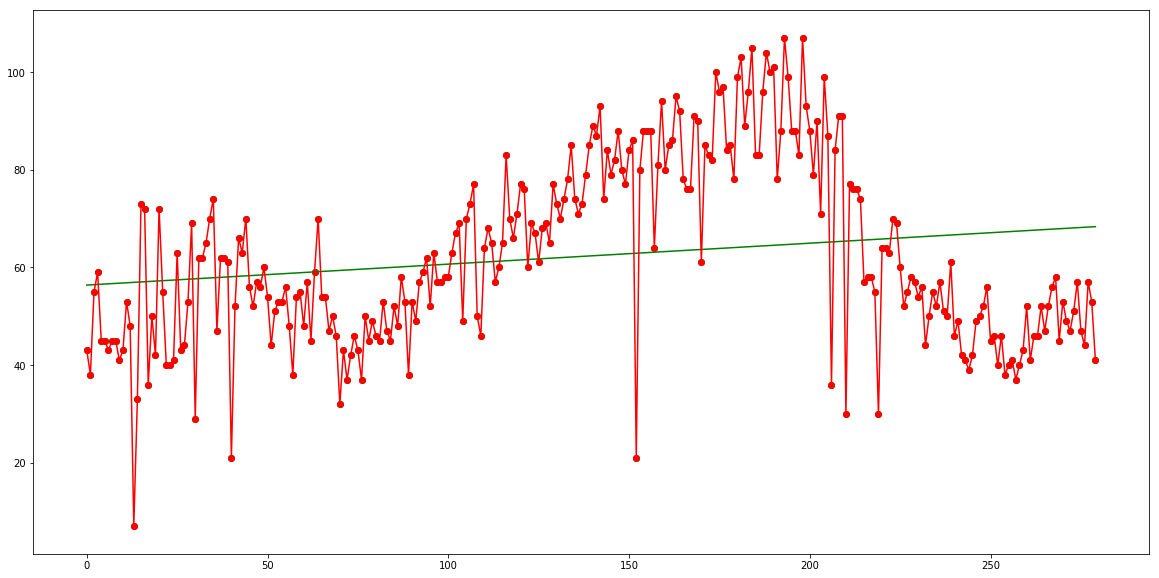

In [39]:
from sklearn.linear_model import LinearRegression

X = np.array(range(280))
y = (df.query('x==20 and y==12').head(280)['taxicount']).as_matrix()

print len(y)

X=X.reshape(-1,1)

model = LinearRegression()
model.fit(X, y)

X_predict=np.array([281,282]).reshape(-1,1)

plt.scatter(X, y,color='g')
plt.plot(X, model.predict(X),color='g')

plt.scatter(X, y, color='r')
plt.plot(X, y, color='r')
plt.show()


In [8]:
by_hour = taxis.fetch_loc_by_time("taxis.db","0855",LAT,LON)
df_hour = pd.DataFrame(by_hour)
df_hour.columns=['Date','X','Y','TaxiCount']
df_hour['Date']=pd.to_datetime(df_hour['Date'])
df_hour

,Date,X,Y,TaxiCount
0,2017-06-25,24,12,40
1,2017-06-26,24,12,60
2,2017-06-27,24,12,18
3,2017-06-28,24,12,15


[0 1 2 3]


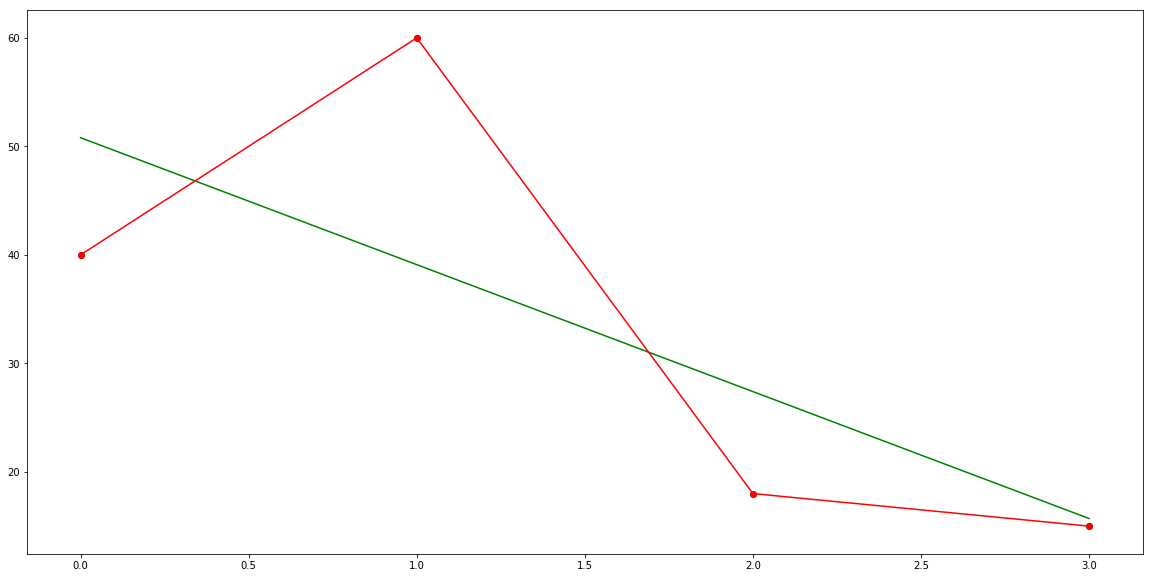

In [38]:
import datetime
X = np.array(range(4))
y = (df_hour.head(4)['TaxiCount']).as_matrix()

print X

X=X.reshape(-1,1)

model = LinearRegression()
model.fit(X, y)

X_predict=np.array([2]).reshape(-1,1)



plt.scatter(X, y,color='g')
plt.plot(X, model.predict(X),color='g')

plt.scatter(X, y, color='r')
plt.plot(X, y, color='r')
plt.show()

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74
 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]


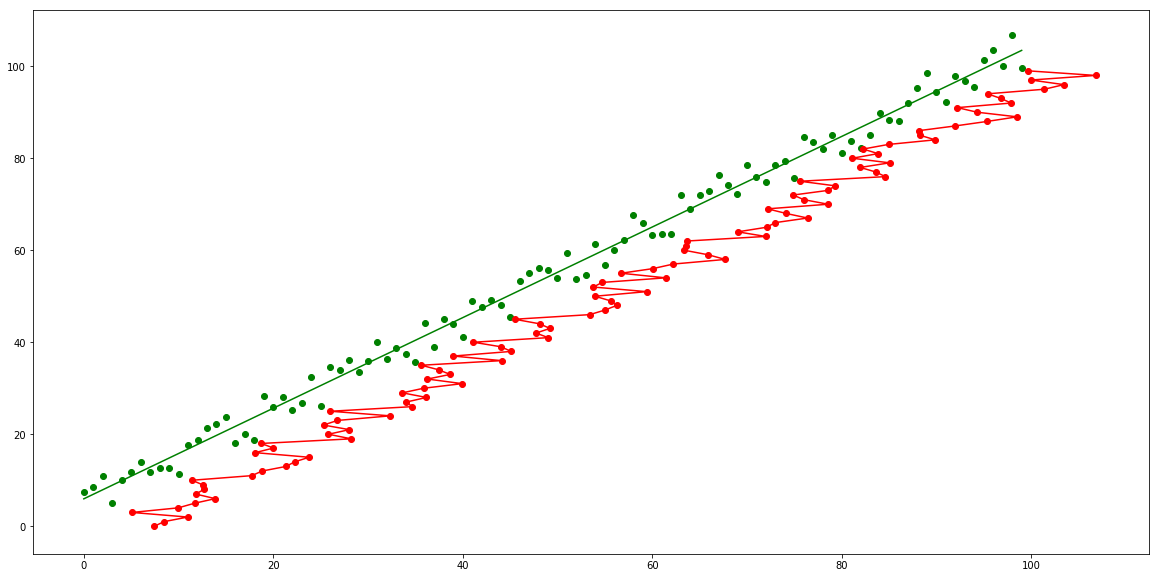

In [36]:
import random
X = np.array(range(100))
y = np.array([x+random.random()*10 for x in range(100)])

print X

X=X.reshape(-1,1)

model = LinearRegression()
model.fit(X, y)

X_predict=np.array([50,101]).reshape(-1,1)


plt.scatter(X, y,color='g')
plt.plot(X, model.predict(X),color='g')

plt.scatter(y, X, color='r')
plt.plot(y, X, color='r')
plt.show()